In [ ]:
#installing packages
install.packages("KFAS")

library(KFAS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please cite KFAS in publications by using: 

  Jouni Helske (2017). KFAS: Exponential Family State Space Models in R. Journal of Statistical Software, 78(10), 1-39. doi:10.18637/jss.v078.i10.



In [ ]:
#loading data
stocks = read.csv('/content/apple_ticker.csv')

attach(stocks)
Date = as.Date(Date,format="%Y-%m-%d")
stocks$Date <- as.Date(stocks$Date, format = "%m/%d/%y")

In [ ]:
#extracting key info
bidprice = Low
askprice = High
closeprice = Close

midprice = (bidprice+askprice)/2

#defining state-space model
model <- SSModel(cbind(bidprice, askprice) ~
                   SSMtrend(degree = 1, Q = list(matrix(7e-2, 2, 2))),
                 H = matrix(NA, 2, 2))

initparam = c(0.1, 0.1, 0.1, 0.1)
fity = fitSSM(model,inits=initparam,method = 'BFGS')

In [ ]:
#applying Kalman Filter
kalman = KFS(fity$model, filtering = "state", smoothing = "state")

price_est = kalman$alphahat[, 1] #extracting first latent state which is = estimated true price



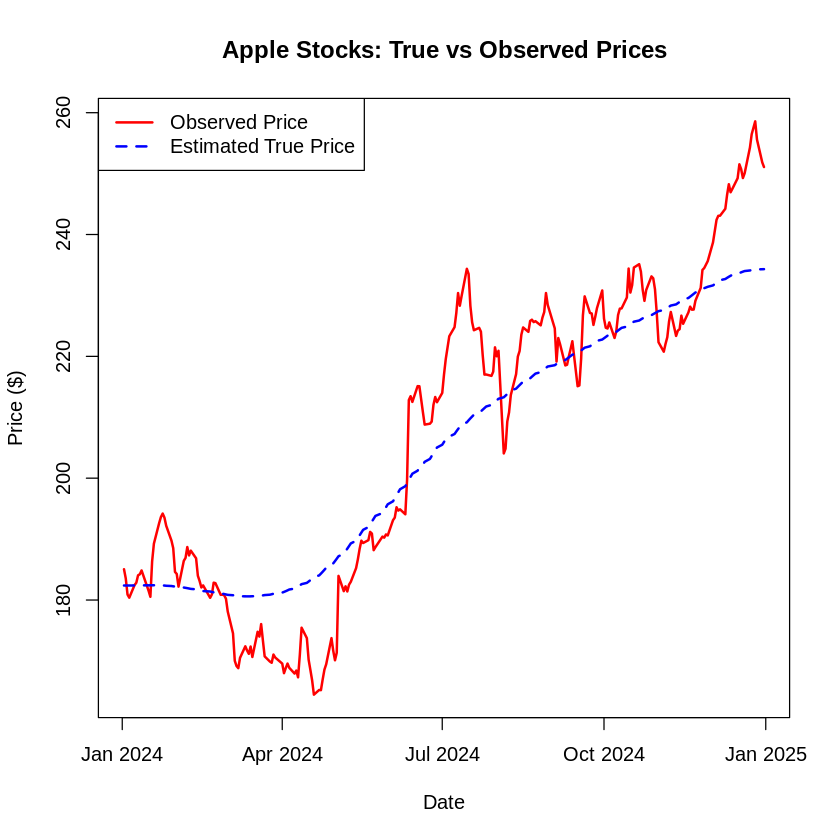

In [ ]:
#Plotting
plot(stocks$Date, midprice, type = "l", col = "red", lwd = 2,
     ylab = "Price ($)", xlab = "Date", main = "Apple Stocks: True vs Observed Prices")
lines(stocks$Date, price_est, col = "blue", lwd = 2, lty = 2) # Estimated price
legend("topleft", legend = c("Observed Price", "Estimated True Price"),
       col = c("red", "blue"), lty = c(1, 2), lwd = 2)

In [ ]:
#Loading Walmart data
walstocks = read.csv('/content/tickdatwalmart.csv')

attach(walstocks)
#Date = as.Date(Date,format="%m/%d/%y")
walstocks$Date <- as.Date(walstocks$Date, format = "%m/%d/%y")

The following object is masked _by_ .GlobalEnv:

    Date


The following objects are masked from stocks:

    BidAskSpread, Close, Date, High, Low, Open, Ticker, Volume




In [ ]:
#extracting key info
bidprice = Low
askprice = High
closeprice = Close

midprice = (bidprice+askprice)/2

#defining state-space model
model <- SSModel(cbind(bidprice, askprice) ~
                   SSMtrend(degree = 1, Q = list(matrix(2e-2, 2, 2))),
                 H = matrix(NA, 2, 2))

initparam = c(0.1, 0.1, 0.1, 0.1)
fity = fitSSM(model,inits=initparam,method = 'BFGS')

#applying Kalman Filter
kalman = KFS(fity$model, filtering = "state", smoothing = "state")

price_est = kalman$alphahat[, 1] #extracting first latent state which is = estimated true price



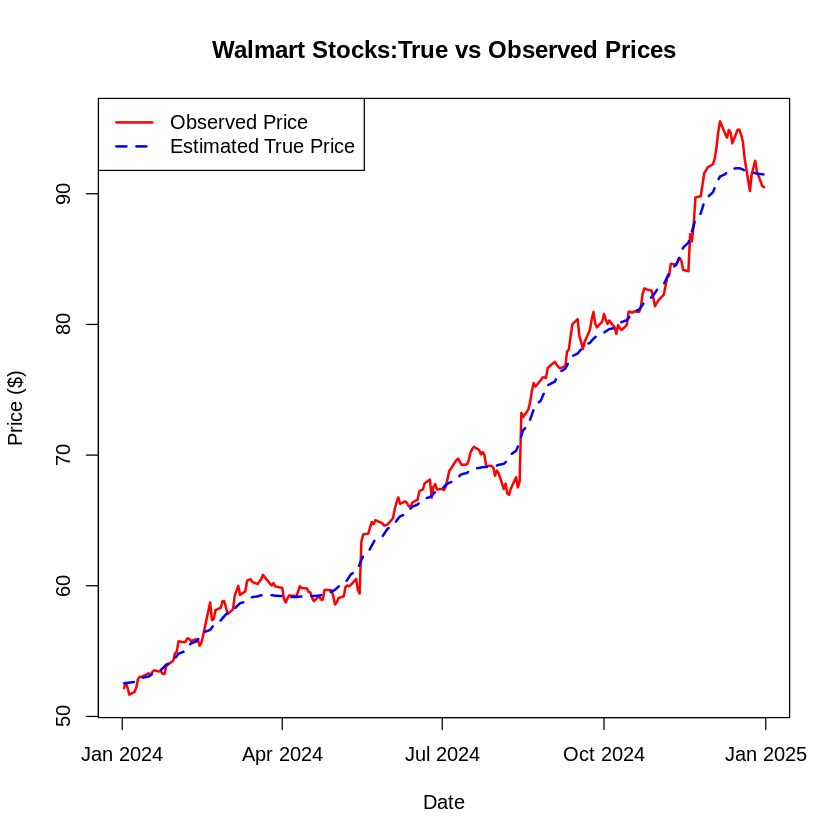

In [ ]:
#Plotting
plot(walstocks$Date, midprice, type = "l", col = "red", lwd = 2,
     ylab = "Price ($)", xlab = "Date", main = "Walmart Stocks:True vs Observed Prices")
lines(walstocks$Date, price_est, col = "blue", lwd = 2, lty = 2) # Estimated price
legend("topleft", legend = c("Observed Price", "Estimated True Price"),
       col = c("red", "blue"), lty = c(1, 2), lwd = 2)